In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import prep_plays
import wrangle_plays_data
from scipy import stats
pd.set_option('display.max_columns', None)

Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


In [2]:
df = prep_plays.prep_plays_data()

In [3]:
df.shape

(17001, 30)

In [4]:
df.isnull().sum()

playDescription           0
quarter                   0
down                      0
yardsToGo                 0
team_by_comp_yds          0
defendersInTheBox         0
numberOfPassRushers       0
QB_under_pressure         0
gameClock                 0
absoluteYardlineNumber    0
epa                       0
pass_stopped              0
playResult                0
RB                        0
TE                        0
WR                        0
DL                        0
LB                        0
DB                        0
EMPTY                     0
I_FORM                    0
JUMBO                     0
PISTOL                    0
SHOTGUN                   0
SINGLEBACK                0
WILDCAT                   0
four_three                0
three_four                0
nickel                    0
dime                      0
dtype: int64

In [5]:
df.head()

,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,pass_stopped,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime
0,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,3,7.0,4.0,0.0,15:00:00,90.0,0.261827,0,10,2,1,2,4,2,5,0,1,0,0,0,0,0,0,0,1,0
1,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,3,7.0,4.0,0.0,13:10:00,49.0,-0.372360,1,0,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0
2,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,3,6.0,4.0,0.0,13:05:00,49.0,-0.702779,1,0,2,1,2,4,2,5,0,0,0,0,1,0,0,0,0,1,0
3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,3,6.0,5.0,1.0,13:01:00,49.0,3.047530,0,33,1,1,3,4,1,6,0,0,0,0,1,0,0,0,0,0,1
4,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,3,8.0,6.0,0.0,10:59:00,11.0,-0.842272,1,0,2,3,0,6,3,2,0,0,0,0,1,0,0,0,0,0,0


In [6]:
df = df[df.defendersInTheBox > 2]
df = df[df.defendersInTheBox < 8]
df = df[df.numberOfPassRushers < 7]
df = df[df.numberOfPassRushers > 2]

In [7]:
df.pass_stopped.value_counts()

0    10136
1     5372
Name: pass_stopped, dtype: int64

In [8]:
df.columns

Index(['playDescription', 'quarter', 'down', 'yardsToGo', 'team_by_comp_yds',
       'defendersInTheBox', 'numberOfPassRushers', 'QB_under_pressure',
       'gameClock', 'absoluteYardlineNumber', 'epa', 'pass_stopped',
       'playResult', 'RB', 'TE', 'WR', 'DL', 'LB', 'DB', 'EMPTY', 'I_FORM',
       'JUMBO', 'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT', 'four_three',
       'three_four', 'nickel', 'dime'],
      dtype='object')

In [9]:
pd.set_option('display.max_colwidth', -1)
df.playDescription.head()

0    (15:00) M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).
1    (13:10) M.Ryan pass incomplete short right to C.Ridley (J.Mills, J.Hicks).              
2    (13:05) (Shotgun) M.Ryan pass incomplete short left to D.Freeman.                       
3    (13:01) (Shotgun) M.Ryan pass deep left to J.Jones to PHI 6 for 33 yards (R.Darby).     
5    (10:10) (Shotgun) N.Foles pass short left to N.Agholor to PHI 8 for 4 yards (R.Alford). 
Name: playDescription, dtype: object

In [10]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_plays_data.train_validate_test(df)

In [11]:
X_train.head()

,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime
2044,3,2,7,22,7.0,4.0,0.0,84.0,1.024401,7,1,2,2,4,3,4,0,0,0,0,1,0,0,1,0,0,0
3062,3,1,10,20,7.0,4.0,0.0,65.0,-0.091884,5,1,2,2,3,4,4,0,0,0,0,1,0,0,0,1,0,0
14975,2,1,10,6,6.0,4.0,0.0,32.0,-0.247160,3,1,1,3,3,3,5,0,0,0,0,1,0,0,0,0,1,0
23,2,2,9,3,6.0,4.0,0.0,60.0,1.651961,23,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0
9461,1,2,9,6,7.0,3.0,1.0,101.0,0.178302,7,1,2,2,4,2,5,0,0,0,0,0,1,0,0,0,1,0


In [12]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle_plays_data.min_max_scale(X_train, X_validate, X_test)

In [13]:
X_train_scaled

,quarter,yardsToGo,numberOfPassRushers,QB_under_pressure,epa,DL,DB
2044,0.50,0.150,0.333333,0.0,0.665664,0.8,0.25
3062,0.50,0.225,0.333333,0.0,0.605722,0.6,0.25
14975,0.25,0.225,0.333333,0.0,0.597384,0.6,0.50
23,0.25,0.200,0.333333,0.0,0.699363,0.8,0.50
9461,0.00,0.200,0.000000,1.0,0.620231,0.8,0.50
...,...,...,...,...,...,...,...
8993,0.75,0.225,0.333333,0.0,0.586106,0.8,0.25
15233,0.50,0.225,0.000000,1.0,0.555249,0.4,1.00
9062,0.50,0.225,0.666667,0.0,0.561580,0.6,0.50
8756,0.25,0.225,0.333333,1.0,0.583832,0.8,0.25


In [14]:
X_train.QB_under_pressure.value_counts()

0.0    5837
1.0    676 
Name: QB_under_pressure, dtype: int64

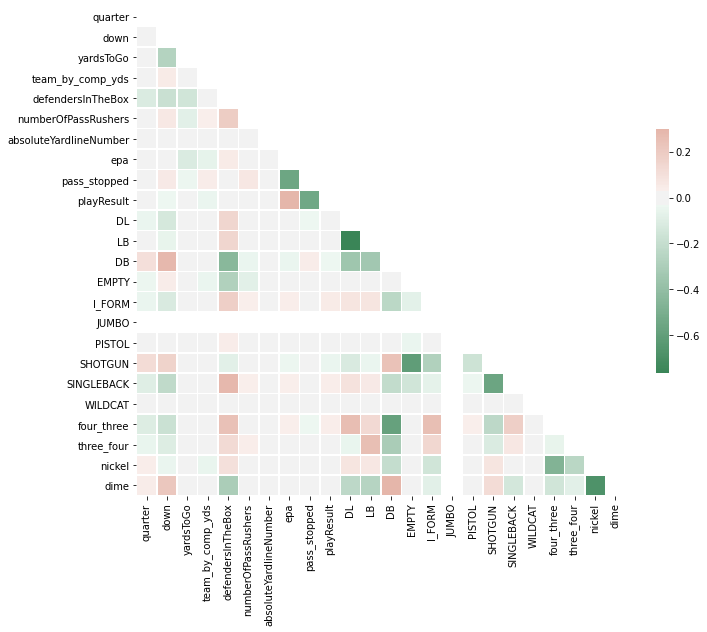

In [15]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 15.0, '')

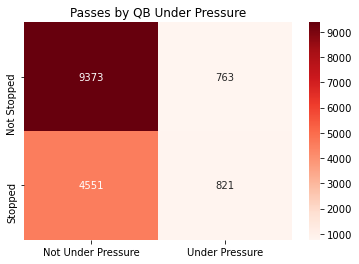

In [16]:
# Create crosstab of data I want to visualize
crosstab = pd.crosstab(df.pass_stopped, df.QB_under_pressure)
# Visualizes heatmap to see differences in values
sns.heatmap(crosstab, annot= True, cmap= 'Reds', fmt= 'd')

plt.title('Passes by QB Under Pressure')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Stopped', 'Stopped'))
plt.xticks(locs, ('Not Under Pressure', 'Under Pressure'))
plt.ylabel('')
plt.xlabel('')

In [17]:
incompletion_rate = (((df.pass_stopped == 1).sum()) / (df.pass_stopped.count())).round(2)
incompletion_rate

0.35

Comparing If Schemes And QB Pressure Impact Incompletion Rate


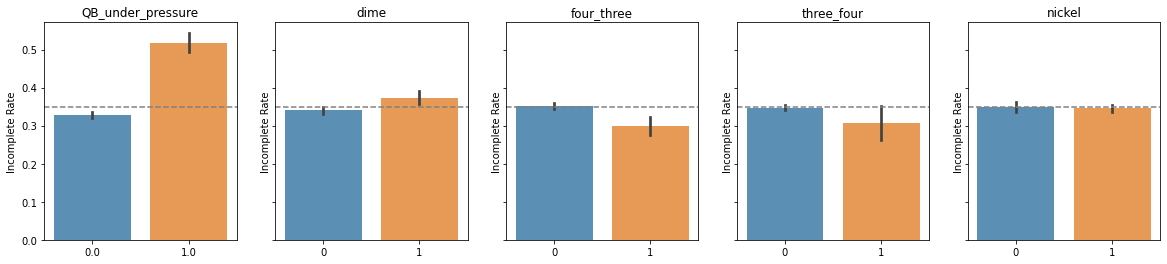

In [18]:
# List all the questions
features = ['QB_under_pressure','dime', 'four_three','three_four', 'nickel']

# subplot each questions side by side
# adding a line to measure where average autism rating is
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'pass_stopped', data=df, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Incomplete Rate')
    ax[i].set_title(feature)
    ax[i].axhline(incompletion_rate, ls='--', color='grey')
print('Comparing If Schemes And QB Pressure Impact Incompletion Rate')

## Conclusion
- Dime and Nickel have a closer to 50/50 chance of stopping the pass over 3-4 and 4-3 defensive schemes based on the data

## Hypothesis 1

H0: There is no difference in stopped passes between nickel defense and average nickel defense

Ha: There is a difference in stopped passes between nickel defense and average nickel defense

In [19]:
alpha= .05
stopped_pass = df[df.pass_stopped == 1]
t, p = stats.ttest_1samp(stopped_pass.nickel, df.nickel.mean())

print(f't = {t:.2f}')
print(f'p = {p:.90f}')
print(f'Our p-value is less than our alpha: {p < alpha}')

t = -0.28
p = 0.782991605027464565580430644331499934196472167968750000000000000000000000000000000000000000
Our p-value is less than our alpha: False


## Hypothesis 2

H0: There is no difference in stopped passes between dime defense and average dime defense

Ha: There is a difference in stopped passes between dime defense and average dime defense

In [20]:
alpha= .05
stopped_pass = df[df.pass_stopped == 1]
t, p = stats.ttest_1samp(stopped_pass.dime, df.dime.mean())

print(f't = {t:.2f}')
print(f'p = {p:.90f}')
print(f'Our p-value is less than our alpha: {p < alpha}')

t = 2.62
p = 0.008717020046651535736259575060103088617324829101562500000000000000000000000000000000000000
Our p-value is less than our alpha: True


## Hypothesis 3

H0: There is no difference in stopped passes between 3-4 defense and average 3-4 defense

Ha: There is a difference in stopped passes between 3-4 defense and average 3-4 defense

In [21]:
alpha= .05
stopped_pass = df[df.pass_stopped == 1]
t, p = stats.ttest_1samp(stopped_pass.three_four, df.three_four.mean())

print(f't = {t:.2f}')
print(f'p = {p:.90f}')
print(f'Our p-value is less than our alpha: {p < alpha}')

t = -1.52
p = 0.129058781499397839942488985798263456672430038452148437500000000000000000000000000000000000
Our p-value is less than our alpha: False


## Hypothesis 4

H0: There is no difference in stopped passes between 4-3 defense and average 4-3 defense

Ha: There is a difference in stopped passes between 4-3 defense and average 4-3 defense

In [22]:
alpha= .05
stopped_pass = df[df.pass_stopped == 1]
t, p = stats.ttest_1samp(stopped_pass.four_three, df.four_three.mean())

print(f't = {t:.2f}')
print(f'p = {p:.90f}')
print(f'Our p-value is less than our alpha: {p < alpha}')

t = -3.42
p = 0.000630989323397577474804298613975106491125188767910003662109375000000000000000000000000000
Our p-value is less than our alpha: True


## Hypothesis 5

H0: A defense stopping a pass is independent of QB pressure

Ha: A defense stopping a pass is not independent of QB pressure

In [23]:
crosstab = pd.crosstab(df.pass_stopped, df.QB_under_pressure)
Chi2, p, degf, expected = stats.chi2_contingency(crosstab)
print(f'Our p-value is {p:.90f}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 0.000000000000000000000000000000000000000000000000000795260261393692992112209408856699085203.
Our p-value is less than our alpha: True


## Hypothesis 6

H0: A defense stopping a pass is independent of which down it is

Ha: A defense stopping a pass is not independent of which down it is

In [24]:
crosstab = pd.crosstab(df.pass_stopped, df.down)
Chi2, p, degf, expected = stats.chi2_contingency(crosstab)
print(f'Our p-value is {p:.90f}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 0.000000000000000000382783099847716665830683424503268983750123485646079746561043499752940988.
Our p-value is less than our alpha: True


# Modeling

In [25]:
# Import the functions I will need for modeling
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Establish our baseline
baseline = ((df.pass_stopped == 1).sum() / df.pass_stopped.count()).round(2)
baseline

0.35

## Feature Engineering

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [28]:
## Assessing the RFE using a linear regression model
lr =  LogisticRegression(random_state=123)

rfe = RFE(lr, 10)
lm_X_rfe_train = rfe.fit_transform(X_train_scaled,y_train)
lm_X_rfe_val = rfe.transform(X_validate_scaled)
lm_X_rfe_test = rfe.transform(X_test_scaled)

In [29]:
## Here we want to filter through and return only the best features
mask = rfe.support_ 
rfe_features = X_train_scaled.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 7 features: quarter, yardsToGo, numberOfPassRushers, QB_under_pressure, epa, DL, DB


In [30]:
# assign random forest to a variable
def random_forest(leaf, depth, estimator):
    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=estimator,
                            max_depth=depth, 
                            random_state=123)
    
    print('---------------------------- Train -------------------------------')
    
    # fit train data
    rf.fit(X_train_scaled, y_train)
    # assign predicitons
    y_pred = rf.predict(X_train_scaled)
    # assign probabilities
    y_pred_proba = rf.predict_proba(X_train_scaled)
    print('Accuracy of random forest classifier on training set: {:.2f}'
         .format(rf.score(X_train_scaled, y_train)))
    print('Training Data Matrix')
    print(confusion_matrix(y_train, y_pred))
    # print report
    print('Training Data Report')
    print(classification_report(y_train, y_pred))
    
    print('---------------------------- Validate -------------------------------')
    
    # assign predicitions
    y_pred = rf.predict(X_validate_scaled)
    # assign probabilities
    y_pred_proba = rf.predict_proba(X_validate_scaled)
    print('Accuracy of random forest classifier on validate set: {:.2f}'
         .format(rf.score(X_validate_scaled, y_validate)))
    print('Training Data Matrix')
    print(confusion_matrix(y_validate, y_pred))
    # print report
    print('Training Data Report')
    print(classification_report(y_validate, y_pred))
    
    print('--------------------- Important Features ---------------------------')
    feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train_scaled.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    return random_forest, feature_importances
    

In [31]:
random_forest(4, 9, 100)

---------------------------- Train -------------------------------
Accuracy of random forest classifier on training set: 0.87
Training Data Matrix
[[3549  708]
 [ 149 2107]]
Training Data Report
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      4257
           1       0.75      0.93      0.83      2256

    accuracy                           0.87      6513
   macro avg       0.85      0.88      0.86      6513
weighted avg       0.89      0.87      0.87      6513

---------------------------- Validate -------------------------------
Accuracy of random forest classifier on validate set: 0.85
Training Data Matrix
[[2293  545]
 [ 125 1379]]
Training Data Report
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      2838
           1       0.72      0.92      0.80      1504

    accuracy                           0.85      4342
   macro avg       0.83      0.86      0.84      4342
weighted

(<function __main__.random_forest(leaf, depth, estimator)>,
                      importance
 epa                  0.879350  
 yardsToGo            0.051200  
 QB_under_pressure    0.018204  
 numberOfPassRushers  0.015162  
 quarter              0.013787  
 DL                   0.011665  
 DB                   0.010633  )

In [32]:
random_forest(8, 15, 100)

---------------------------- Train -------------------------------
Accuracy of random forest classifier on training set: 0.88
Training Data Matrix
[[3660  597]
 [ 156 2100]]
Training Data Report
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4257
           1       0.78      0.93      0.85      2256

    accuracy                           0.88      6513
   macro avg       0.87      0.90      0.88      6513
weighted avg       0.90      0.88      0.89      6513

---------------------------- Validate -------------------------------
Accuracy of random forest classifier on validate set: 0.85
Training Data Matrix
[[2355  483]
 [ 163 1341]]
Training Data Report
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2838
           1       0.74      0.89      0.81      1504

    accuracy                           0.85      4342
   macro avg       0.84      0.86      0.84      4342
weighted

(<function __main__.random_forest(leaf, depth, estimator)>,
                      importance
 epa                  0.870153  
 yardsToGo            0.054045  
 quarter              0.018936  
 QB_under_pressure    0.016257  
 DL                   0.014600  
 numberOfPassRushers  0.013645  
 DB                   0.012363  )

In [33]:
import MVP

In [34]:
MVP.MVP()

---------------------------- Train -------------------------------
Accuracy of random forest classifier on training set: 0.89
Training Data Matrix
[[4025  617]
 [ 172 2326]]
Training Data Report
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4642
           1       0.79      0.93      0.85      2498

    accuracy                           0.89      7140
   macro avg       0.87      0.90      0.88      7140
weighted avg       0.90      0.89      0.89      7140

---------------------------- Validate -------------------------------
Accuracy of random forest classifier on validate set: 0.86
Validate Data Matrix
[[2577  518]
 [ 148 1517]]
Validate Data Report
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3095
           1       0.75      0.91      0.82      1665

    accuracy                           0.86      4760
   macro avg       0.85      0.87      0.85      4760
weighted

(<function MVP.MVP()>,
                      importance
 epa                  0.866636  
 yardsToGo            0.053530  
 numberOfPassRushers  0.024579  
 quarter              0.016113  
 QB_under_pressure    0.015485  
 DL                   0.012571  
 DB                   0.011085  )